<a href="https://colab.research.google.com/github/sak1b0/Thesis/blob/master/adapt_bayes_adapt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

object data types:  0
----------debug start----------
main data:  (432, 7)
x:  (432, 6)
y:  (432, 1)
x_train:  (302, 6)
x_test:  (130, 6)
y_train:  (302,)
y_test:  (130,)
----------debug end----------
no of features:  6
actual no of classes:  2


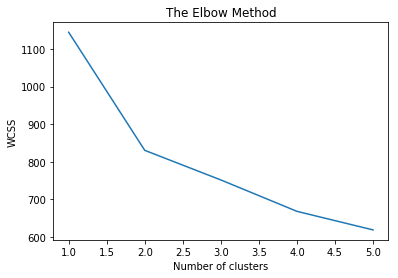

"\n\n\ndummy=x_train\ndisplay(dummy[0:2,])\n\nclustering = KMeans(n_clusters=2,random_state=5)\nclustering.fit(dummy)\ndummy_df=pd.DataFrame(dummy)\n\ndummy_df.columns=['a','b','c','d','e','f','g']\ny=y_train\n#y.columns=['target']\ncolor_theme= np.array(['blue','green'])\nplt.subplot(1,2,1)\n\nplt.scatter(x=dummy_df.a,y=dummy_df.b,c=color_theme[y],s=50)\nplt.title('clusters')\n"

In [61]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#import pylab as pl
import pandas as pd
import numpy as np

url='https://raw.githubusercontent.com/sak1b0/Thesis/master/allCSV/monk-2.csv'

df=pd.read_csv(url,header=None)
#print(df.iloc[0,:])

#----------to handle nominal values---------

my_arr=[]

#track of column indices 
index=0
for item in df.dtypes:
  if(item=='object'):
    #if data type is nominal adding to the array
    my_arr.append(index)
  index=index+1
  
print('object data types: ',len(my_arr))

df=df.values

if(len(my_arr)>0):
  lbl=LabelEncoder()
  for item in my_arr:
    df[:,item] = lbl.fit_transform(df[:,item])
    
  print('after the conversion: ',df[0])    
#--------------------------------------------


df=np.asarray(df)

X, y = np.split(df,[-1],axis=1)
#issue here !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
y=y.astype('float64')

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

#to check additional info set the value of debug to 1
debug=0

def debug_me():
  print('----------debug start----------')
  print('main data: ',df.shape)
  print('x: ',X.shape)
  print('y: ',y.shape)
  print('x_train: ',x_train.shape)
  print('x_test: ',x_test.shape)
  print('y_train: ',y_train.shape)
  print('y_test: ',y_test.shape)
  print('----------debug end----------')




# X=np.asarray(X)
# y=np.asarray(y)
# y=y.ravel() #vector to array

x_train=np.asarray(x_train)
x_test=np.asarray(x_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

y_train=y_train.ravel()
y_test=y_test.ravel()

debug_me()
#==========preprocessing done============


#==========optimal number of clusters====
no_of_features=x_train.shape[1]

print('no of features: ',no_of_features)
print('actual no of classes: ',len(np.unique(y_train)))
plt.figure(figsize=(6, 4))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, no_of_features):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, no_of_features), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#=================experiment===========
"""


dummy=x_train
display(dummy[0:2,])

clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(dummy)
dummy_df=pd.DataFrame(dummy)

dummy_df.columns=['a','b','c','d','e','f','g']
y=y_train
#y.columns=['target']
color_theme= np.array(['blue','green'])
plt.subplot(1,2,1)

plt.scatter(x=dummy_df.a,y=dummy_df.b,c=color_theme[y],s=50)
plt.title('clusters')
"""